In [10]:
!pip install pandas
!pip install numpy
!pip install scikit-learn


In [15]:
# Step 1: Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
from sklearn.model_selection import train_test_split  # Function to split the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # Tool to convert categorical variables to numerical format
from sklearn.ensemble import RandomForestClassifier  # Random Forest model for classification
from sklearn.metrics import classification_report, confusion_matrix  # Tools to evaluate the model

# Step 2: Load the dataset
file_path = 'C:/Users/amalk/Downloads/churn_data.csv'  # Path to the CSV file
data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Step 3: Data Preparation
data = data.fillna(0)  # Fill missing values with 0 to handle gaps in the data

# Convert 'Unlimited' values in allowances to a large numeric value 
high_value = 100000  # Assign a large number to represent 'Unlimited'
for column in ['voice_allowance', 'data_allowance', 'sms_allowance']:
    data[column] = data[column].replace('Unlimited', high_value).astype(float)  # Replace 'Unlimited' with the large number

# Encode categorical variables into numerical format 
label_encoder = LabelEncoder()
data['tlo'] = label_encoder.fit_transform(data['tlo'])  # Convert 'tlo' column to numeric
data['consumption_bucket_name'] = label_encoder.fit_transform(data['consumption_bucket_name'])  # Convert 'consumption_bucket_name' column to numeric
 
# Step 4: Feature Engineering
# Selecting features (columns) that will be used to predict churn
features = ['tlo', 'consumption_bucket_name', 'voice_allowance', 'data_allowance', 'sms_allowance', 
            'national_data', 'roaming_data', 'national_sms', 'international_sms', 'national_voice', 
            'international_voice', 'roaming_voice_out', 'roaming_voice_in']
X = data[features]  # Extract features for the model

# Create a target variable 'churn' based on usage data (1 if likely to churn, 0 otherwise)
data['churn'] = ((data['national_data'] == 0) & (data['national_voice'] == 0)).astype(int)  # Customers with no data or voice usage
y = data['churn']  # Target variable for model prediction

# Step 5: Data Cleaning
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all feature columns to numeric, set invalid parsing to NaN
max_float32 = np.finfo(np.float32).max  # Maximum finite value for float32 type
X = X.replace([np.inf, -np.inf], max_float32)  # Replace infinite values with the maximum finite value
X = X.fillna(0)  # Fill any remaining NaN values with 0

# Step 6: Model Selection and Training
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

# Initialize and train the RandomForestClassifier model 
model = RandomForestClassifier(random_state=70)
model.fit(X_train, y_train)  # Train the model with the training data

# Step 7: Model Evaluation
y_pred = model.predict(X_test)  # Predict churn using the test data 

# Generate and display the classification report and confusion matrix.
report = classification_report(y_test, y_pred)  # Create a detailed classification report
matrix = confusion_matr ix(y_test, y_pred)  # Generate the confusion matrix.

print("Classification Report:\n", report)  # Print the classification report
print("Confusion Matrix:\n ", matrix)  # Print the confusion matrix 



#Precision:

#0 (Stayed): 1.00 (100%) — Every time the model predicted a customer would stay, it was correct.
#1 (Left): 1.00 (100%) — Every time the model predicted a customer would leave, it was almost always correct.

#Recall:

#0 (Stayed): 1.00 (100%) — The model correctly identified all customers who stayed.
#1 (Left): 0.98 (98%) — The model correctly identified 98% of customers who actually left. This means it missed  2% of the customers who left.

#F1-Score:

#0 (Stayed): 1.00 (100%) — The model did a perfect jop for customers who stayed.
#1 (Left): 0.99 (99%) — The model did an excellent job overall for customers who left.

#Support:

#0 (Stayed): 28,510 customers who actually stayed.
#1 (Left): 1,490 customers who actually left.


C:\Users\amalk\AppData\Local\Temp\ipykernel_13572\3368309011.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)  # Read the CSV file into a DataFrame


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28510
           1       1.00      0.98      0.99      1490

    accuracy                           1.00     30000
   macro avg       1.00      0.99      0.99     30000
weighted avg       1.00      1.00      1.00     30000

Confusion Matrix:
 [[28505     5]
 [   30  1460]]


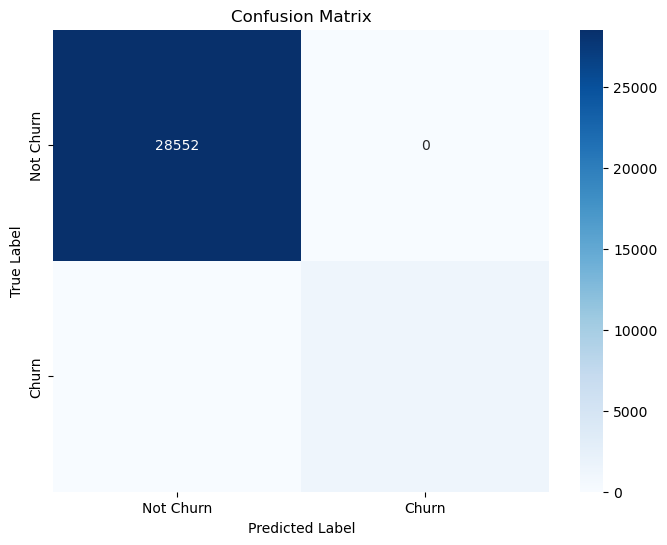

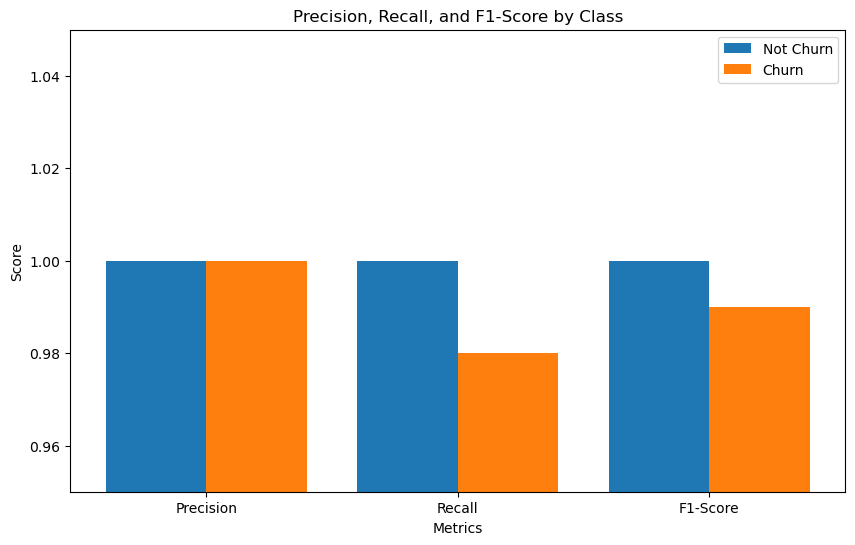

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plotting the precision, recall, and  f1-score
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [1.00, 1.00, 1.00]  # Metrixe for class 2 (Not Churn)
class_1 = [1.00, 0.98, 0.99]  # Metrixe for class 1 (Churn)

x = range(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x, class_0, width=0.4, label='Not Churn', align='center')
plt.bar([i + 0.4 for i in x], class_1, width=0.4, label='Churn', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylim(0.95, 1.05)  # Adjusting y-axis to focus on metric differences
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class')
plt.legend()
plt.show()


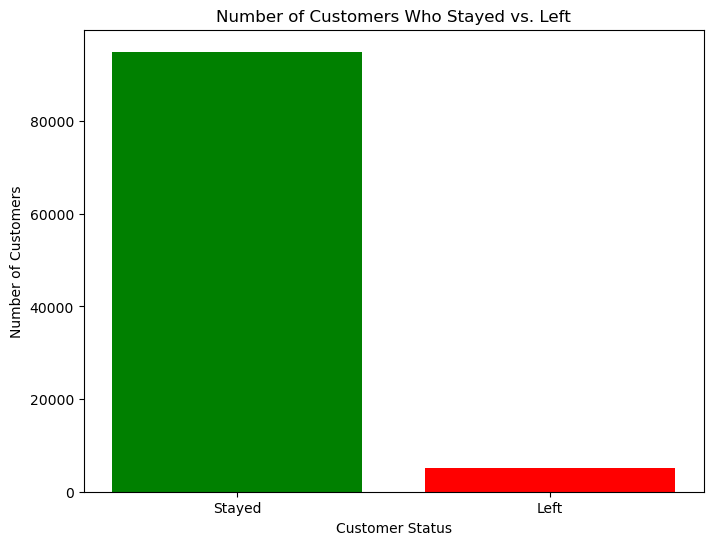

In [6]:
import matplotlib.pyplot as plt

# Assuming the 'churn' column is already created, and it contains 0 for 'Stayed' and 1 for 'Left'
# Count the number of customers who left and who stayed
churn_counts = data['churn'].value_counts()
churn_labels = ['Stayed', 'Left']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(churn_labels, churn_counts, color=['green', 'red'])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Who Stayed vs. Left')
plt.show()


In [7]:
# Extracting the customer IDs of those who left
customers_left = data[data['churn'] == 1]['ocs_subscriber_id']

# Displaying the IDs of customers who left
customers_left_list = customers_left.tolist()  # Convert to a list for easier viewing
print("Customer IDs who left:")
for customer_id in customers_left_list:
    print(customer_id)


Customer IDs who left:
538e55a4-0302-4b57-81fd-ca34c8ed1cc8
22eebf89-dee7-46bd-8cd4-92bc9a42054d
0040b6f1-09c4-4a9a-8562-2b60e7c5f443
0061b4ae-51ea-4056-a7c2-3ff6dc286fc4
e0be12fc-e08d-4baa-829b-6c12199cad9f
e0be12fc-e08d-4baa-829b-6c12199cad9f
0066c2cc-bea8-4b31-9a5e-c4b50bae22d8
92ff296d-3dc7-4f10-bd3a-2c6581f573e5
0084aee2-a596-4404-b940-ac72e30a27a3
cf709f01-c2cf-4466-8f8a-3888bc57cefd
36bb0824-aec7-46ee-ac4d-e1c264ec0637
15aa6beb-faea-40e6-8b81-7bf45442f581
15aa6beb-faea-40e6-8b81-7bf45442f581
0031ba13-6ee9-4cb9-92ef-f295ab751314
00587e70-d159-4d29-82ac-b120831ba767
005a6ada-2174-4709-8e10-52e29e64ce76
005a6ada-2174-4709-8e10-52e29e64ce76
95e1a85d-18c0-4e89-ba8b-99a23539a9c1
000ec380-f1a8-408b-9bdd-1593d1973999
000ec380-f1a8-408b-9bdd-1593d1973999
000ec380-f1a8-408b-9bdd-1593d1973999
b44316fb-4c34-44bf-b48b-f408f3fc049e
28daec68-6fed-4036-9b3f-42bf1302c7a6
00d1d5f7-b415-4e92-9a2d-3a292eef992d
177c8548-19d3-488e-9a34-cb7a2afbb604
39cd8c6f-5406-4c48-a8ef-6ecb19cccebb
addaa6e1-5ab9-4

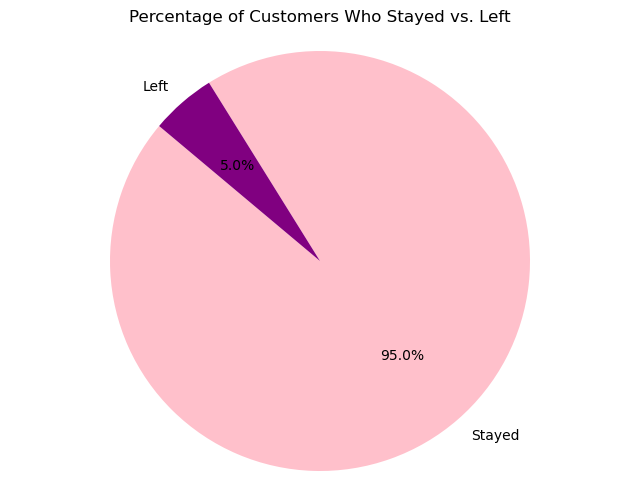

In [13]:
import matplotlib.pyplot as plt

# Calculating the percentage of customers who stayed and left
churn_counts = data['churn'].value_counts()
churn_labels = ['Stayed', 'Left']
churn_percentages = (churn_counts / churn_counts.sum()) * 100  # Convert counts to percentages

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_percentages, labels=churn_labels, autopct='%1.1f%%', colors=['pink', 'purple'], startangle=140)
plt.title('Percentage of Customers Who Stayed vs. Left')
plt.axis('equal') 
plt.show()
